In [3]:
import pandas as pd
import numpy as np

In [4]:
knowledge_train=pd.read_csv("knowledge modelling.csv")

In [5]:
knowledge_train.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [6]:
knowledge_train.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
5,0.14,0.14,0.70,0.50,0.30,Low
6,0.16,0.16,0.80,0.50,0.50,Middle
7,0.12,0.12,0.75,0.68,0.15,Low
8,0.20,0.20,0.88,0.77,0.80,High
9,0.16,0.25,0.01,0.10,0.07,Very Low


In [7]:
knowledge_train.loc[knowledge_train.UNS == 'Very Low',"UNS"] = 0
knowledge_train.loc[knowledge_train.UNS == 'Low', "UNS"] = 1
knowledge_train.loc[knowledge_train.UNS == 'Middle','UNS'] = 2
knowledge_train.loc[knowledge_train.UNS == 'High', 'UNS'] = 3

In [8]:
knowledge_train.head(15)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
5,0.14,0.14,0.70,0.50,0.30,1
6,0.16,0.16,0.80,0.50,0.50,2
7,0.12,0.12,0.75,0.68,0.15,1
8,0.20,0.20,0.88,0.77,0.80,3
9,0.16,0.25,0.01,0.10,0.07,0


# Data visualizations

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5,1,"Relation of Student's knowledge and The exam performance of user for goal objects")

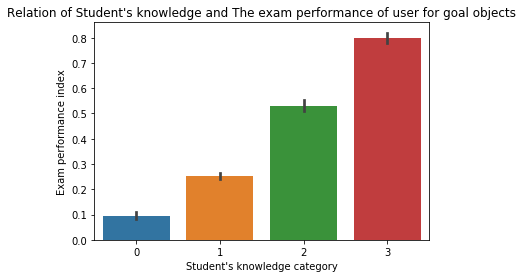

In [10]:
sns.barplot(x="UNS",y="PEG", data=knowledge_train)
plt.ylabel("Exam performance index")
plt.xlabel("Student's knowledge category")
plt.title("Relation of Student's knowledge and The exam performance of user for goal objects")

Text(0.5,1,"Relation of Student's knowledge and The degree of study time for goal object")

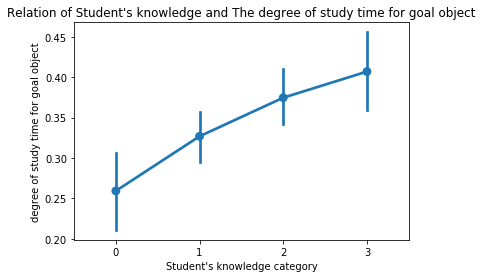

In [11]:
sns.pointplot(x="UNS",y="STG", data=knowledge_train)
plt.ylabel("degree of study time for goal object")
plt.xlabel("Student's knowledge category")
plt.title("Relation of Student's knowledge and The degree of study time for goal object")

Text(0.5,1,"Relation of Student's knowledge and The degree of repetition for course material")

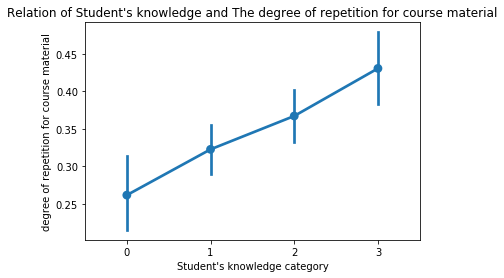

In [12]:
sns.pointplot(x="UNS",y="SCG", data=knowledge_train)
plt.ylabel("degree of repetition for course material")
plt.xlabel("Student's knowledge category")
plt.title("Relation of Student's knowledge and The degree of repetition for course material")

Text(0.5,1,"Relation of Student's knowledge and The degree of study time of user for related objects with goal object")

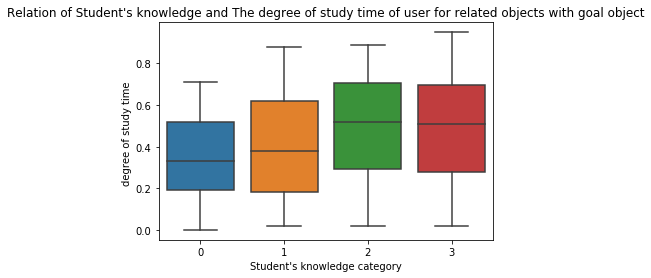

In [13]:
sns.boxplot(x="UNS",y="STR", data=knowledge_train)
plt.ylabel("degree of study time ")
plt.xlabel("Student's knowledge category")
plt.title("Relation of Student's knowledge and The degree of study time of user for related objects with goal object")

Text(0.5,1,"Relation of Student's knowledge and related objects with goal object proficiency")

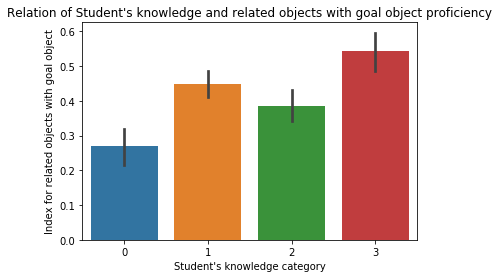

In [14]:
sns.barplot(x="UNS",y="LPR", data=knowledge_train)
plt.ylabel("Index for related objects with goal object")
plt.xlabel("Student's knowledge category")
plt.title("Relation of Student's knowledge and related objects with goal object proficiency")

# Relationship modelling 

fINDING THE Correlation for model selection

In [15]:
np.corrcoef(knowledge_train['UNS'], knowledge_train['PEG'])

array([[1.        , 0.91945631],
       [0.91945631, 1.        ]])

As we see, only a single variable 'PEG' i.e the exam performance is alone enough predictor to 
decide the knowledge of the student

In [16]:
train_features=knowledge_train.loc[:,['STG','SCG','STR','LPR','PEG']].values

In [17]:
labels=knowledge_train['UNS'].values

In [18]:
from sklearn.model_selection import train_test_split

Impute Missing values

In [19]:
knowledge_train.fillna(method='ffill', inplace=True)
knowledge_train.fillna(method='bfill', inplace=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(knowledge_train, labels, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = RandomForestClassifier()

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
clf.score(X_train, y_train)

1.0

In [25]:
predictions = clf.predict(X_test)

In [26]:
accuracy_score(y_test, predictions)

NameError: name 'accuracy_score' is not defined

In [ ]:
print(classification_report(y_test, predictions))

In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

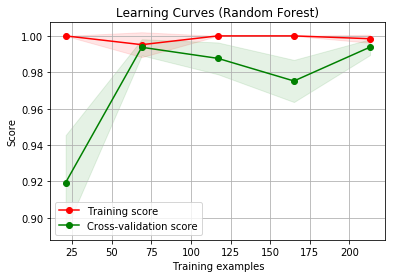

In [28]:
title = 'Learning Curves (Random Forest)'
estimator = clf
plot_learning_curve(estimator, title, X_train, y_train)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

Modelling using 'SVM'

Using Deep Learning model

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation


F:\nff\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
model = Sequential()
model.add(Dense(500, input_dim=6))
model.add(Dense(400))
model.add(Dense(300))
model.add(Dense(200))
model.add(Dense(1))

In [41]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               3500      
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 384,601
Trainable params: 384,601
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
322/322 [==============================] - 1s 3ms/step - loss: 0.4164 - acc: 0.6988
Epoch 2/10
322/322 [==============================] - 0s 932us/step - loss: 0.0173 - acc: 1.0000
Epoch 3/10
322/322 [==============================] - 0s 919us/step - loss: 0.0014 - acc: 1.0000
Epoch 4/10
322/322 [==============================] - 0s 870us/step - loss: 4.2160e-05 - acc: 1.0000
Epoch 5/10
322/322 [==============================] - 0s 870us/step - loss: 4.3320e-06 - acc: 1.0000
Epoch 6/10
322/322 [==============================] - 0s 870us/step - loss: 3.9697e-07 - acc: 1.0000
Epoch 7/10
322/322 [==============================] - 0s 919us/step - loss: 2.9535e-07 - acc: 1.0000
Epoch 8/10
322/322 [==============================] - 0s 870us/step - loss: 2.2533e-07 - acc: 1.0000
Epoch 9/10
322/322 [==============================] - 0s 832us/step - loss: 7.1261e-08 - acc: 1.0000
Epoch 10/10
322/322 [==============================] - 0s 894us/step - loss: 2.7754e-08 - acc: 1.0000


In [44]:
m_pred=model.predict(X_test)